In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [115]:
df=pd.read_csv('Bologna_clean.csv')
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/42196,50 sm Studio in the historic centre,The studio is a fully restored ancient basemen...,No se proporcionan detalles,https://a0.muscache.com/pictures/4775726/68044...,Carlo,2010-07-29,within an hour,100%,f,...,4.65,4.92,4.88,4.87,4.66,2.0,2.0,0.0,0.0,1.37
1,https://www.airbnb.com/rooms/46352,A room in Pasolini's house,"Simple, cozy and silent room in a lived house ...",In the very nearby you have Via Saragozza and ...,https://a0.muscache.com/pictures/9f94acc3-98fc...,Eleonora,2011-03-28,a few days or more,44%,f,...,4.60,4.83,4.85,4.84,4.67,2.0,0.0,2.0,0.0,2.57
2,https://www.airbnb.com/rooms/85368,Garden House Bologna,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/585815/331d45...,Anna Maria,2011-03-28,Desconocido,-%,f,...,4.83,4.98,4.98,4.80,4.81,1.0,1.0,0.0,0.0,0.39
3,https://www.airbnb.com/rooms/204553,Private Room & Bath Ex-Convent in Centro Storico,The neighbourhood is the most prestigious of B...,"Safest, most central, quietest street in Bolog...",https://a0.muscache.com/pictures/36151297/8be9...,Elizabeth,2011-05-09,within an hour,100%,f,...,4.92,4.94,4.93,4.97,4.86,1.0,0.0,1.0,0.0,1.68
4,https://www.airbnb.com/rooms/219878,Gorgeous Haven in Centro Storico,"Quiet, bright, fully equipped 800 square feet ...","has many shops, cafes, wine bars, restaurants ...",https://a0.muscache.com/pictures/f16e5b7e-68b3...,Elisa,2011-09-10,within a few hours,100%,t,...,4.95,4.90,4.92,4.84,4.78,2.0,2.0,0.0,0.0,1.09


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   4843 non-null   object 
 1   name                                          4843 non-null   object 
 2   description                                   4843 non-null   object 
 3   neighborhood_overview                         4843 non-null   object 
 4   picture_url                                   4843 non-null   object 
 5   host_name                                     4843 non-null   object 
 6   host_since                                    4843 non-null   object 
 7   host_response_time                            4843 non-null   object 
 8   host_response_rate                            4843 non-null   object 
 9   host_is_superhost                             4843 non-null   o

In [117]:
f1=df

In [118]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   4843 non-null   object 
 1   name                                          4843 non-null   object 
 2   description                                   4843 non-null   object 
 3   neighborhood_overview                         4843 non-null   object 
 4   picture_url                                   4843 non-null   object 
 5   host_name                                     4843 non-null   object 
 6   host_since                                    4843 non-null   object 
 7   host_response_time                            4843 non-null   object 
 8   host_response_rate                            4843 non-null   object 
 9   host_is_superhost                             4843 non-null   o

In [119]:
#convertimos las variables de tipo object a tipo numérico 
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\pplcf\AppData\Local\Temp\ipykernel_10224\1529444581.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})


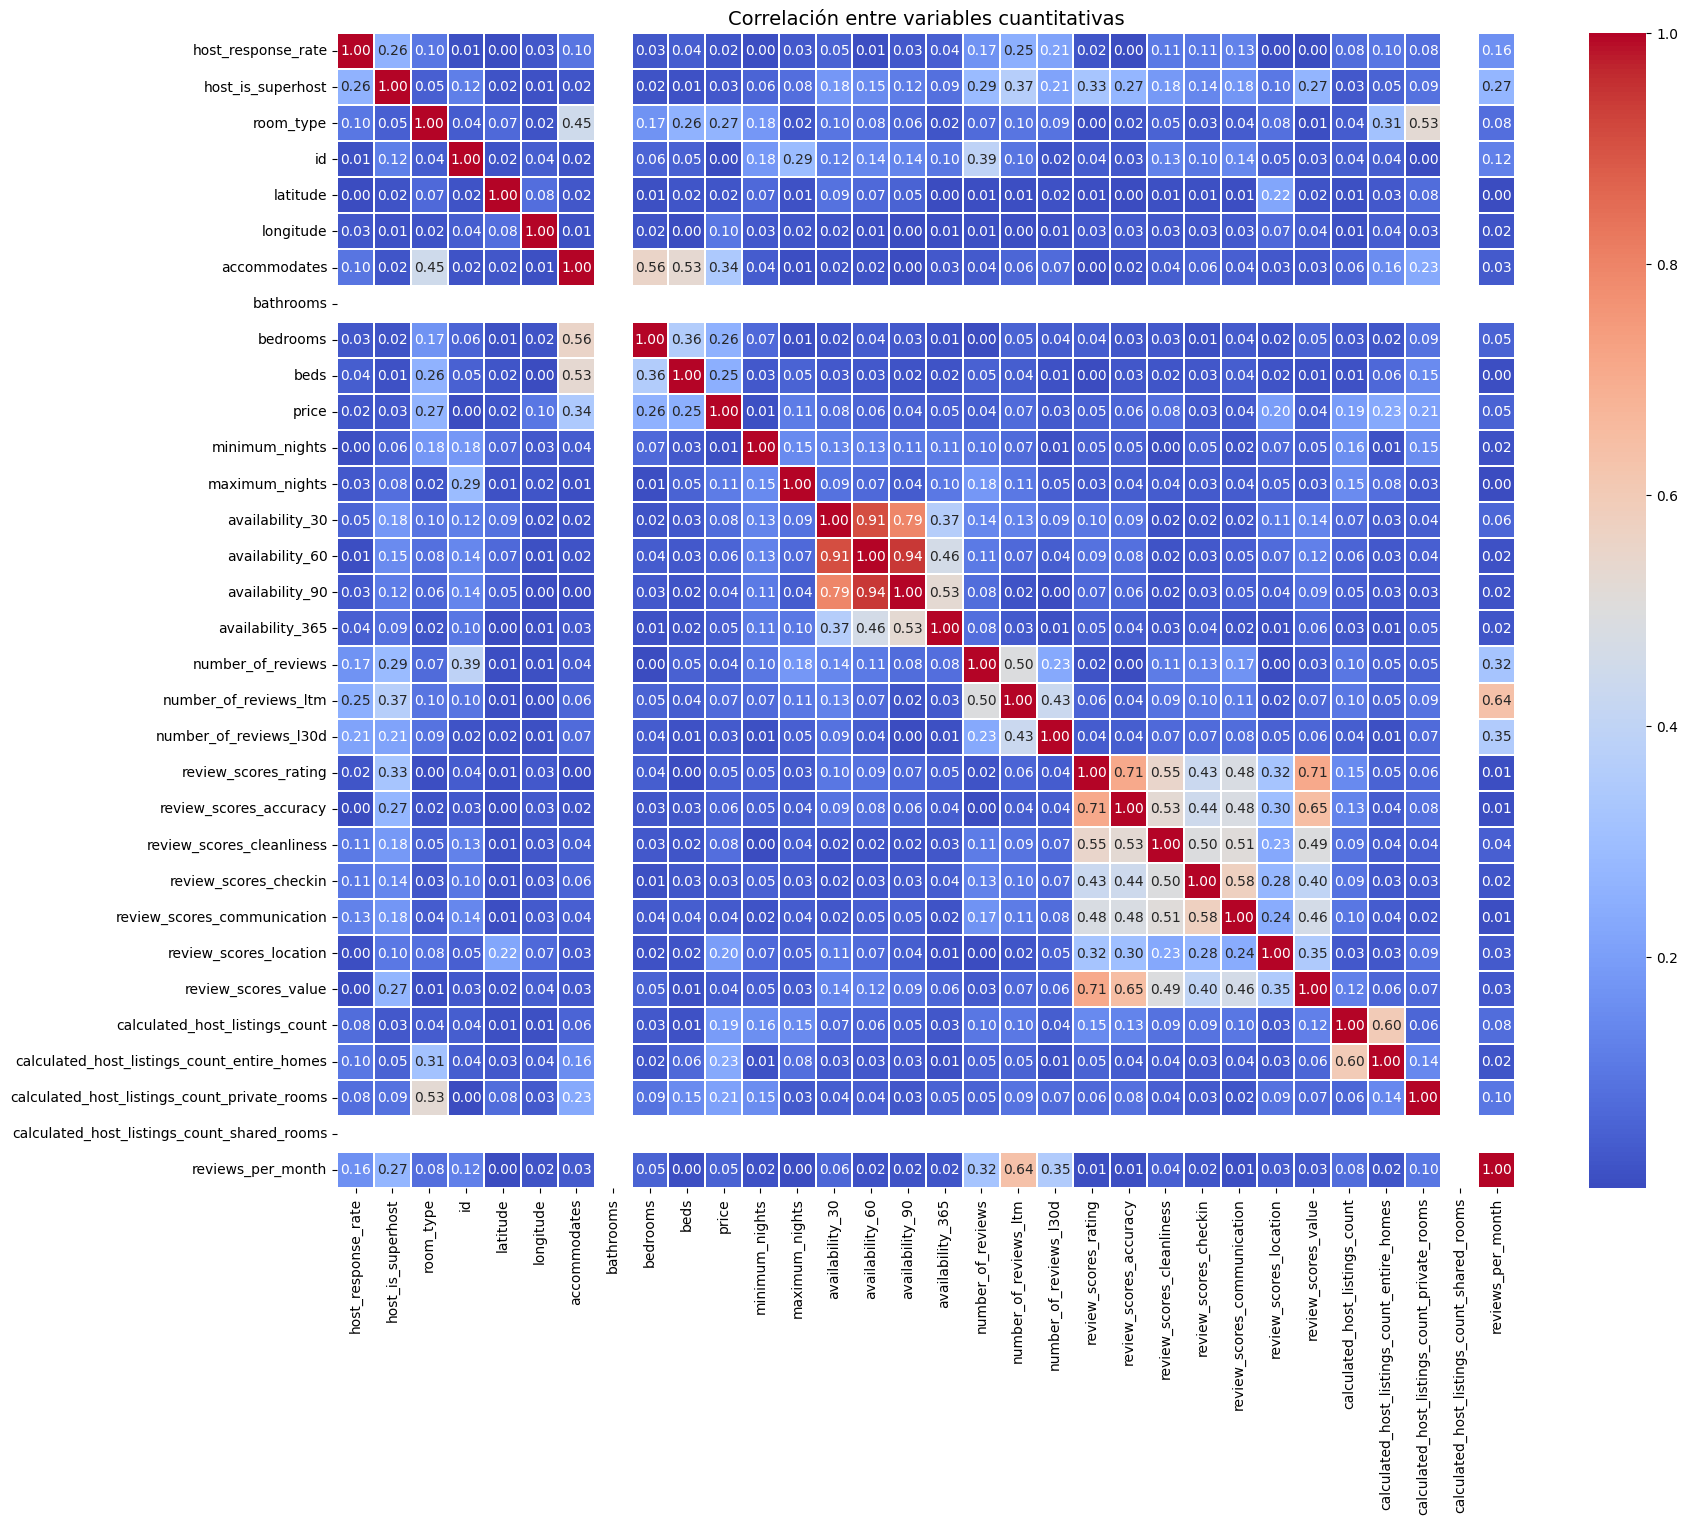

In [120]:
df_numeric = f1.select_dtypes(include=['float64', 'int64'])

#Matriz de correlación
corr_matrix = df_numeric.corr()
corr_matrix2= abs(corr_matrix)

#Heatmap
plt.figure(figsize=(19, 15))  # Ajusta el tamaño
sns.heatmap(corr_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.10)

#Titulo
plt.title("Correlación entre variables cuantitativas", fontsize=14)

# Mostrar la gráfica
plt.show()

**Graficas**

<Axes: xlabel='number_of_reviews', ylabel='id'>

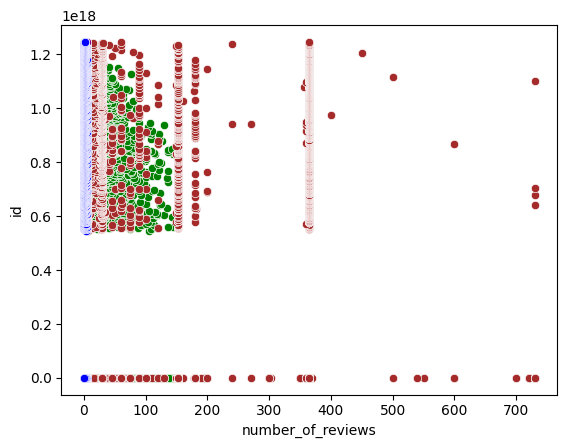

In [121]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='id', color="Green", data=f1)
sns.scatterplot(x='review_scores_cleanliness', y='id', color="Orange", data=f1)
sns.scatterplot(x='maximum_nights', y='id', color="Brown", data=f1)
sns.scatterplot(x='review_scores_communication', y='id', color="Purple", data=f1)
sns.scatterplot(x='reviews_per_month', y='id', color="Blue", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

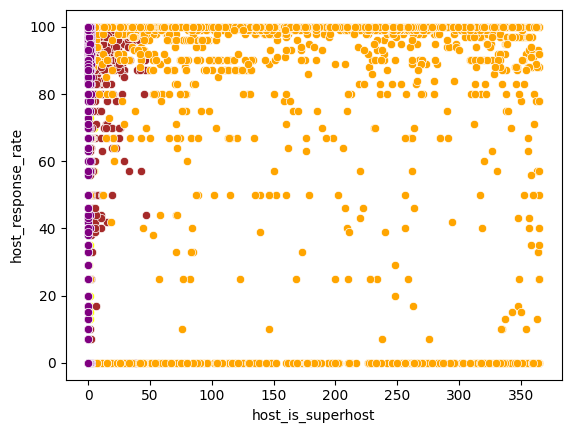

In [122]:
from turtle import color

sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="blue", data=f1)
sns.scatterplot(x='reviews_per_month', y='host_response_rate', color="yellow", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='host_response_rate', color="brown", data=f1)
sns.scatterplot(x='availability_365', y='host_response_rate', color="orange", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='host_response_rate', color="purple", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

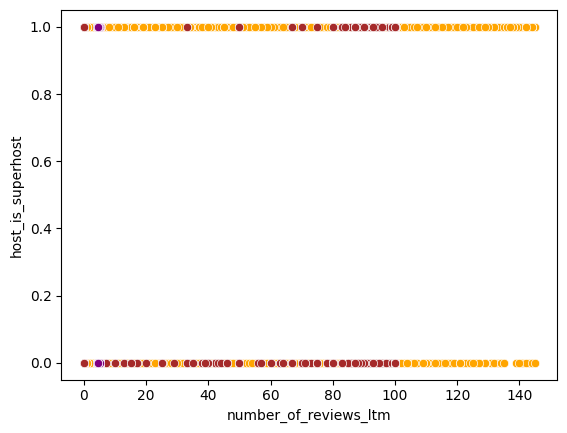

In [123]:
from turtle import color

sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="blue", data=f1)
sns.scatterplot(x='number_of_reviews', y='host_is_superhost', color="orange", data=f1)
sns.scatterplot(x='host_response_rate', y='host_is_superhost', color="brown", data=f1)
sns.scatterplot(x='review_scores_rating', y='host_is_superhost', color="green", data=f1)
sns.scatterplot(x='review_scores_value', y='host_is_superhost', color="purple", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

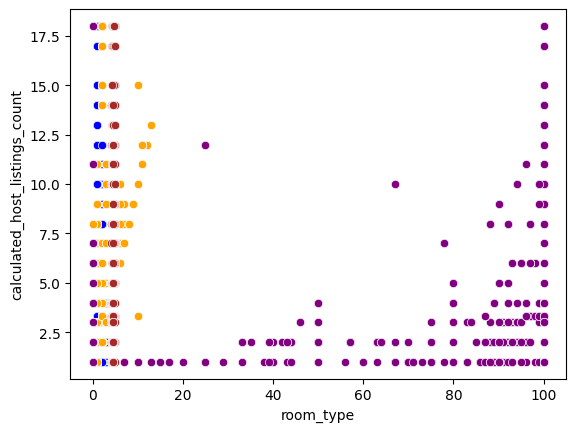

In [124]:
from turtle import color

sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="blue", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='calculated_host_listings_count', color="orange", data=f1)
sns.scatterplot(x='review_scores_value', y='calculated_host_listings_count', color="brown", data=f1)
sns.scatterplot(x='host_response_rate', y='calculated_host_listings_count', color="purple", data=f1)


<Axes: xlabel='bedrooms', ylabel='room_type'>

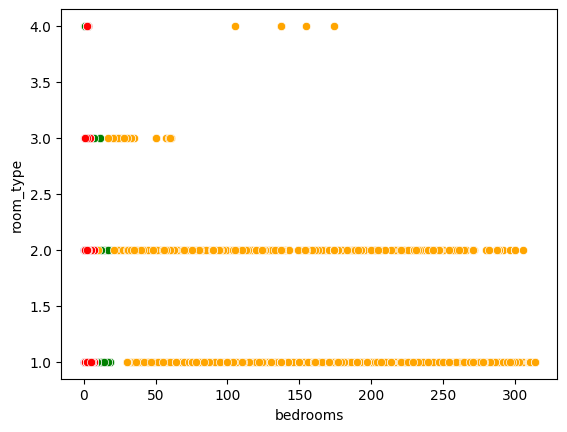

In [125]:
from turtle import color

sns.scatterplot(x='bedrooms', y='room_type', color="brown", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="pink", data=f1)
sns.scatterplot(x='beds', y='room_type', color="purple", data=f1)
sns.scatterplot(x='calculated_host_listings_count', y='room_type', color="green", data=f1)
sns.scatterplot(x='price', y='room_type', color="orange", data=f1)
sns.scatterplot(x='accommodates', y='room_type', color="red", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

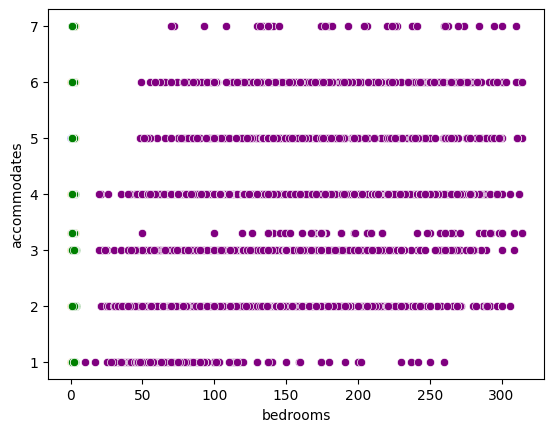

In [126]:
from turtle import color

sns.scatterplot(x='bedrooms', y='accommodates', color="blue", data=f1)
sns.scatterplot(x='beds', y='accommodates', color="orange", data=f1)
sns.scatterplot(x='price', y='accommodates', color="purple", data=f1)
sns.scatterplot(x='room_type', y='accommodates', color="green", data=f1)

<Axes: xlabel='price', ylabel='bedrooms'>

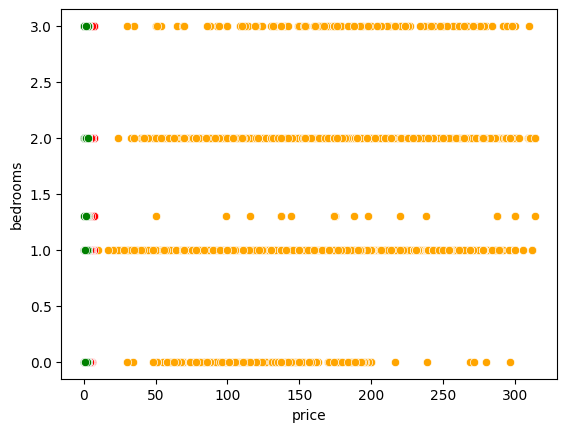

In [127]:
from turtle import color

sns.scatterplot(x='price', y='bedrooms', color="orange", data=f1)
sns.scatterplot(x='accommodates', y='bedrooms', color="red", data=f1)
sns.scatterplot(x='beds', y='bedrooms', color="green", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

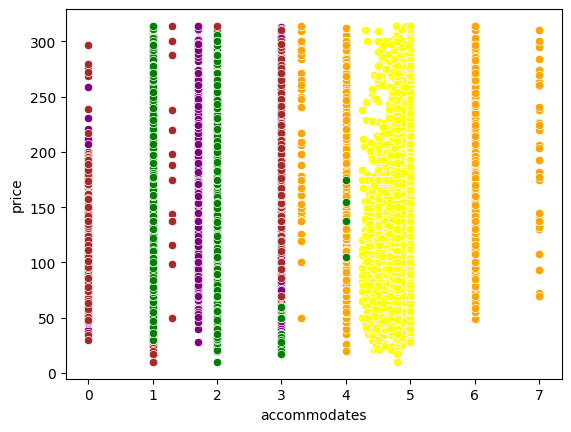

In [128]:
from turtle import color

sns.scatterplot(x='accommodates', y='price', color="orange", data=f1)
sns.scatterplot(x='review_scores_location', y='price', color="yellow", data=f1)
sns.scatterplot(x='beds', y='price', color="purple", data=f1)
sns.scatterplot(x='bedrooms', y='price', color="brown", data=f1)
sns.scatterplot(x='room_type', y='price', color="green", data=f1)

<Axes: xlabel='review_scores_cleanliness', ylabel='review_scores_value'>

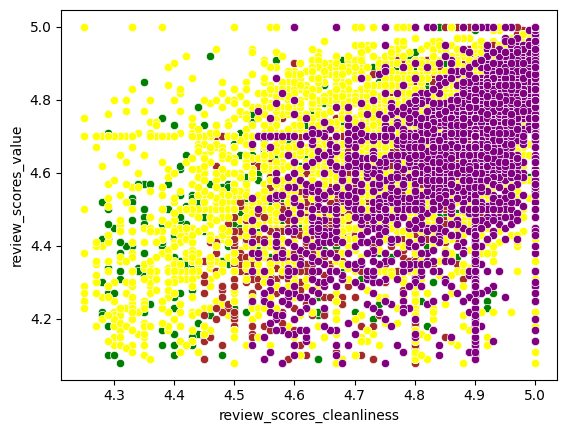

In [129]:
from turtle import color

sns.scatterplot(x='review_scores_cleanliness', y='review_scores_value', color="green", data=f1)
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="yellow", data=f1)
sns.scatterplot(x='review_scores_accuracy', y='review_scores_value', color="brown", data=f1)
sns.scatterplot(x='review_scores_location', y='review_scores_value', color="yellow", data=f1)
sns.scatterplot(x='review_scores_communication', y='review_scores_value', color="purple", data=f1)


<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

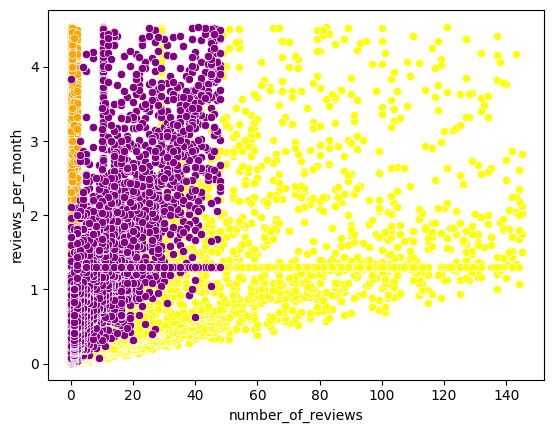

In [130]:
from turtle import color

sns.scatterplot(x='number_of_reviews', y='reviews_per_month', color="yellow", data=f1)
sns.scatterplot(x='number_of_reviews_l30d', y='reviews_per_month', color="orange", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="purple", data=f1)

**DECLARACIÓN DE VARIABLES DEPENDIENTES E INDEPENDIENTES**

In [131]:
Vars_Indep= f1[['number_of_reviews', 'review_scores_cleanliness', 'maximum_nights', 'review_scores_communication', 'reviews_per_month']]
Vars_Indep2=f1[['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm', 'availability_365', 'number_of_reviews_l30d', 'availability_90', 'availability_60', 'availability_30']]
Vars_Indep3=f1[['number_of_reviews_ltm','number_of_reviews','host_response_rate','review_scores_rating', 'review_scores_value', 'reviews_per_month']]
Vars_Indep4=f1[['room_type','calculated_host_listings_count_entire_homes', 'review_scores_value', 'host_response_rate']]
Vars_Indep5=f1[['price', 'accommodates', 'bedrooms', 'calculated_host_listings_count_entire_homes', 'beds', 'calculated_host_listings_count']]
Vars_Indep6=f1[['bedrooms', 'beds', 'price', 'room_type']]
Vars_Indep7=f1[['accommodates', 'beds', 'price']]
Vars_Indep8=f1[['accommodates', 'bedrooms', 'review_scores_location', 'beds', 'room_type']]
Vars_Indep9=f1[['review_scores_cleanliness', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_location', 'review_scores_communication']]
Vars_Indep10=f1[['number_of_reviews','number_of_reviews_l30d', 'number_of_reviews_ltm']]

In [132]:
Var_Dep= f1['id']
Var_Dep2= f1['host_response_rate']
Var_Dep3= f1['host_is_superhost']
Var_Dep4= f1['calculated_host_listings_count']
Var_Dep5= f1['room_type']
Var_Dep6= f1['accommodates']
Var_Dep7= f1['bedrooms']
Var_Dep8= f1['price']
Var_Dep9= f1['review_scores_value']
Var_Dep10= f1['reviews_per_month']

In [133]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model2=LinearRegression()
model3= LinearRegression()
model4=LinearRegression()
model5= LinearRegression()
model6=LinearRegression()
model7= LinearRegression()
model8=LinearRegression()
model9= LinearRegression()
model10=LinearRegression()

In [134]:
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)
type(model9)
type(model10)

sklearn.linear_model._base.LinearRegression

In [135]:
model.fit(X=Vars_Indep, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep2)
model3.fit(X=Vars_Indep3, y=Var_Dep3)
model4.fit(X=Vars_Indep4, y=Var_Dep4)
model5.fit(X=Vars_Indep5, y=Var_Dep5)
model6.fit(X=Vars_Indep6, y=Var_Dep6)
model7.fit(X=Vars_Indep7, y=Var_Dep7)
model8.fit(X=Vars_Indep8, y=Var_Dep8)
model9.fit(X=Vars_Indep9, y=Var_Dep9)
model10.fit(X=Vars_Indep10, y=Var_Dep10)

LinearRegression()

In [136]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness', 'maximum_nights',
        'review_scores_communication', 'reviews_per_month'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([-6.33791293e+15,  1.12557984e+17,  7.09673871e+14,  1.76860384e+17,
         1.22417074e+17]),
 'rank_': 5,
 'singular_': array([1.00640921e+04, 2.26136979e+03, 6.85006658e+01, 1.25972823e+01,
        6.10188602e+00]),
 'intercept_': np.float64(-9.791244179423782e+17)}

In [137]:
model.score(Vars_Indep,Var_Dep)

0.2736842729965343

In [138]:
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost', 'reviews_per_month', 'number_of_reviews_ltm',
        'availability_365', 'number_of_reviews_l30d', 'availability_90',
        'availability_60', 'availability_30'], dtype=object),
 'n_features_in_': 8,
 'coef_': array([ 1.28520250e+01, -6.38938894e-01,  3.79259777e-01,  1.09928590e-02,
         5.86239012e+00,  1.52141457e-01, -6.67505471e-02, -2.78157556e-01]),
 'rank_': 8,
 'singular_': array([8278.30412758, 1940.67898438,  824.42054837,  416.46059442,
         169.89782528,   56.24447608,   38.64739727,   30.9998921 ]),
 'intercept_': np.float64(71.00691756592855)}

In [139]:
model2.score(Vars_Indep2,Var_Dep2)

0.11369565164270357

In [140]:
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews', 'host_response_rate',
        'review_scores_rating', 'review_scores_value', 'reviews_per_month'],
       dtype=object),
 'n_features_in_': 6,
 'coef_': array([0.00802356, 0.00190308, 0.00256485, 0.75556941, 0.15144354,
        0.03619819]),
 'rank_': 6,
 'singular_': array([2512.84050273, 2093.13031475,  686.70419442,   55.92550717,
          16.93060501,    6.87784446]),
 'intercept_': np.float64(-4.349958735530503)}

In [141]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model3.score(Vars_Indep3,Var_Dep3)

0.277937512849705

In [142]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type', 'calculated_host_listings_count_entire_homes',
        'review_scores_value', 'host_response_rate'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 1.84378906,  0.94773763, -1.3158016 ,  0.00358964]),
 'rank_': 4,
 'singular_': array([2280.04431543,  158.79996576,   29.12547878,   13.85967893]),
 'intercept_': np.float64(4.9427749677201405)}

In [143]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model4.score(Vars_Indep4,Var_Dep4)

0.42286275961571596

In [144]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['price', 'accommodates', 'bedrooms',
        'calculated_host_listings_count_entire_homes', 'beds',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 6,
 'coef_': array([-0.00087349, -0.14120975,  0.09015859, -0.08301638, -0.009948  ,
         0.04724672]),
 'rank_': 6,
 'singular_': array([4081.7989942 ,  245.05969299,  115.24107288,   91.2826925 ,
          39.03544644,   32.53016163]),
 'intercept_': np.float64(1.7337654082362515)}

In [145]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model5.score(Vars_Indep5,Var_Dep5)

0.351402977087803

In [146]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms', 'beds', 'price', 'room_type'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.8445547 ,  0.57503597,  0.00215554, -0.83789025]),
 'rank_': 4,
 'singular_': array([4081.28101362,   51.0365919 ,   34.93946609,   28.67158156]),
 'intercept_': np.float64(1.9635137059648142)}

In [147]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model6.score(Vars_Indep6,Var_Dep6)

0.53039632758928

In [148]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'beds', 'price'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.21874724, 0.06454925, 0.00068658]),
 'rank_': 3,
 'singular_': array([4081.38012033,   90.07177338,   39.11460111]),
 'intercept_': np.float64(0.32731368990700704)}

In [149]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model7.score(Vars_Indep7,Var_Dep7)

0.31831127308121554

In [150]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['accommodates', 'bedrooms', 'review_scores_location', 'beds',
        'room_type'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([  7.864923  ,  10.42154894,  59.94811261,   6.57176735,
        -17.71439499]),
 'rank_': 5,
 'singular_': array([100.14761458,  39.17060287,  33.54582199,  26.45334923,
         12.14545922]),
 'intercept_': np.float64(-178.9754095055384)}

In [151]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model8.score(Vars_Indep8,Var_Dep8)

0.17760782215762305

In [152]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model9.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness', 'review_scores_rating',
        'review_scores_accuracy', 'review_scores_location',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 5,
 'coef_': array([0.07654214, 0.50577933, 0.35499949, 0.12146827, 0.15107945]),
 'rank_': 5,
 'singular_': array([17.87037455, 11.02653881,  8.23100459,  6.01494861,  5.36362874]),
 'intercept_': np.float64(-1.1479101063127022)}

In [153]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model9.score(Vars_Indep9,Var_Dep9)

0.5662093691294792

In [154]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model10.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'number_of_reviews_l30d',
        'number_of_reviews_ltm'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00028126, 0.16692494, 0.05208905]),
 'rank_': 3,
 'singular_': array([2340.5556046 ,  699.14871774,   39.17295495]),
 'intercept_': np.float64(0.7241175687492022)}

In [155]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model10.score(Vars_Indep10,Var_Dep10)

0.41174563267385245

In [156]:
#Predecimos los valores a partir de las variables independientes 
y_pred= model.predict(X=Vars_Indep)
y_pred

array([4.11917222e+17, 1.04465571e+18, 1.34053455e+17, ...,
       6.98076338e+17, 7.18656880e+17, 9.35107410e+17], shape=(4843,))

In [157]:
#Predecimos los valores a partir de las variables independientes 
y_pred2= model2.predict(X=Vars_Indep2)
y_pred2

array([89.04505475, 98.28215999, 74.30650978, ..., 75.24191932,
       75.82140794, 71.18200166], shape=(4843,))

In [158]:
#Predecimos los valores a partir de las variables independientes 
y_pred3= model3.predict(X=Vars_Indep3)
y_pred3

array([ 0.34342005,  0.56194008,  0.27279725, ..., -0.04060533,
        0.21588005, -0.04060533], shape=(4843,))

In [159]:
#Predecimos los valores a partir de las variables independientes 
y_pred4= model4.predict(X=Vars_Indep4)
y_pred4

array([2.90936815, 2.64350393, 1.40529596, ..., 1.6816143 , 2.04057862,
       1.6816143 ], shape=(4843,))

In [160]:
#Predecimos los valores a partir de las variables independientes 
y_pred5= model5.predict(X=Vars_Indep5)
y_pred5

array([1.39013837, 1.58849008, 1.05053437, ..., 1.1300466 , 1.40843833,
       0.93278376], shape=(4843,))

In [161]:
#Predecimos los valores a partir de las variables independientes 
y_pred6= model6.predict(X=Vars_Indep6)
y_pred6

array([2.71765751, 1.80001219, 4.05095908, ..., 3.30131565, 2.76076836,
       5.05717092], shape=(4843,))

In [162]:
#Predecimos los valores a partir de las variables independientes 
y_pred7= model7.predict(X=Vars_Indep7)
y_pred7

array([0.8842836 , 0.85888024, 1.61317288, ..., 1.38907364, 0.89801514,
       1.77947616], shape=(4843,))

In [163]:
#Predecimos los valores a partir de las variables independientes 
y_pred8= model8.predict(X=Vars_Indep8)
y_pred8

array([127.98066619, 108.46782782, 162.40085337, ..., 146.08591165,
       123.78429831, 170.94415093], shape=(4843,))

In [164]:
#Predecimos los valores a partir de las variables independientes 
y_pred9= model9.predict(X=Vars_Indep9)
y_pred9

array([4.57699268, 4.5948015 , 4.78718577, ..., 4.65440593, 4.65440593,
       4.65440593], shape=(4843,))

In [165]:
#Predecimos los valores a partir de las variables independientes 
y_pred10= model10.predict(X=Vars_Indep10)
y_pred10

array([1.68056292, 3.34741258, 1.10561646, ..., 0.72411757, 0.72411757,
       0.72411757], shape=(4843,))

In [ ]:
#Insertamos la columna de predicciones 
f1.insert(0, 'Pred_id', y_pred)
f1.insert(1, 'Pred_hrr', y_pred2)
f1.insert(2, 'Pred_his', y_pred3)
f1.insert(3, 'Pred_chl', y_pred4)
f1.insert(4, 'Pred_room', y_pred5)
f1.insert(5, 'Pred_accommodates', y_pred6)
f1.insert(6, 'Pred_bedrooms', y_pred7)
f1.insert(7, 'Pred_price', y_pred8)
f1.insert(8, 'Pred_rsv', y_pred9)
f1.insert(9, 'Pred_rpm', y_pred10)
f1

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.119172e+17,89.045055,0.343420,2.909368,1.390138,2.717658,0.884284,127.980666,4.576993,1.680563,...,4.65,4.92,4.88,4.87,4.66,2.0,2.0,0.0,0.0,1.37
1,1.044656e+18,98.282160,0.561940,2.643504,1.588490,1.800012,0.858880,108.467828,4.594801,3.347413,...,4.60,4.83,4.85,4.84,4.67,2.0,0.0,2.0,0.0,2.57
2,1.340535e+17,74.306510,0.272797,1.405296,1.050534,4.050959,1.613173,162.400853,4.787186,1.105616,...,4.83,4.98,4.98,4.80,4.81,1.0,1.0,0.0,0.0,0.39
3,4.891002e+17,74.350099,0.501143,2.594522,1.578653,3.325224,0.957072,133.254399,4.766612,0.992747,...,4.92,4.94,4.93,4.97,4.86,1.0,0.0,1.0,0.0,1.68
4,5.036431e+17,91.131420,0.422336,2.751472,1.331615,2.862079,0.930284,126.182223,4.756760,0.992747,...,4.95,4.90,4.92,4.84,4.78,2.0,2.0,0.0,0.0,1.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,5.946917e+17,79.456779,0.487716,2.410309,1.517659,1.858212,0.877418,118.059526,4.901433,0.943413,...,5.00,5.00,5.00,5.00,5.00,1.0,0.0,1.0,0.0,1.00
4839,9.351074e+17,70.714905,0.215880,2.988316,0.794627,4.242794,1.789088,160.522602,4.654406,0.724118,...,5.00,5.00,5.00,4.80,4.60,2.0,2.0,0.0,0.0,1.70
4840,6.980763e+17,75.241919,-0.040605,1.681614,1.130047,3.301316,1.389074,146.085912,4.654406,0.724118,...,5.00,5.00,5.00,4.80,4.60,1.0,1.0,0.0,0.0,1.70
4841,7.186569e+17,75.821408,0.215880,2.040579,1.408438,2.760768,0.898015,123.784298,4.654406,0.724118,...,5.00,5.00,5.00,4.80,4.60,1.0,1.0,0.0,0.0,1.70


**GRÁFICAS PREDICCIONES**

<Axes: xlabel='number_of_reviews', ylabel='id'>

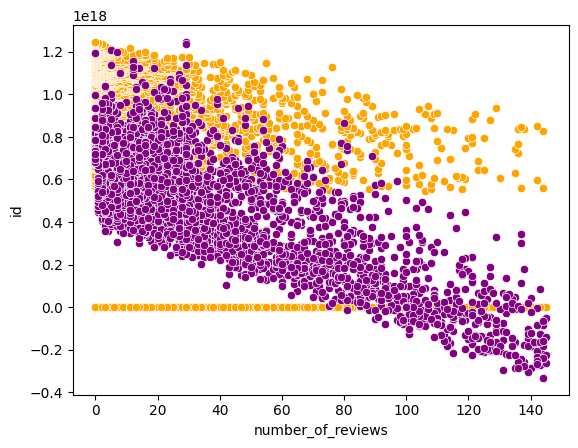

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='number_of_reviews', y='id', color="orange", data=f1)
sns.scatterplot(x='number_of_reviews', y='Pred_id', color="purple", data=f1)

<Axes: xlabel='host_is_superhost', ylabel='host_response_rate'>

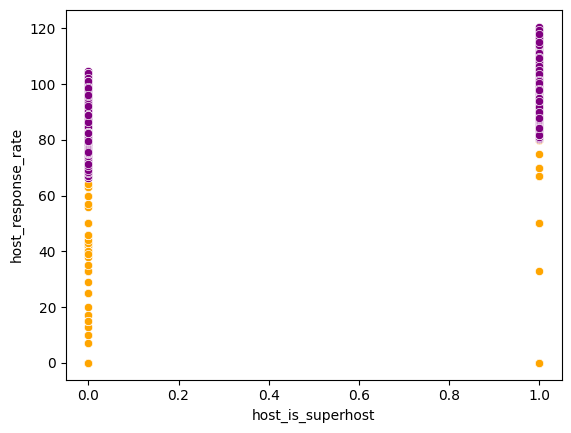

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='host_is_superhost', y='host_response_rate', color="orange", data=f1)
sns.scatterplot(x='host_is_superhost', y='Pred_hrr', color="purple", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='host_is_superhost'>

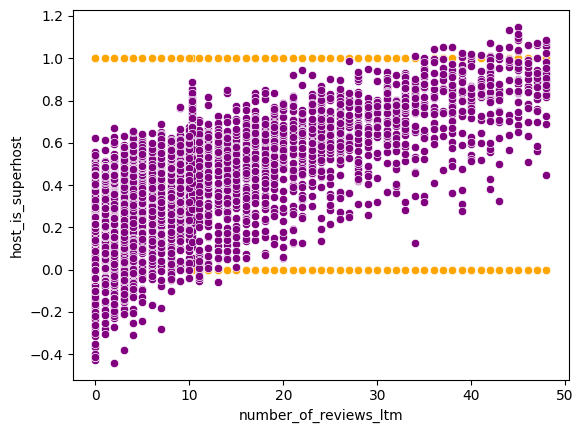

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='number_of_reviews_ltm', y='host_is_superhost', color="orange", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_his', color="purple", data=f1)

<Axes: xlabel='room_type', ylabel='calculated_host_listings_count'>

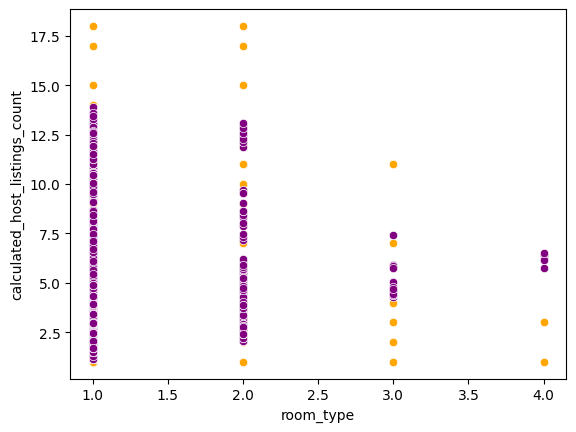

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='room_type', y='calculated_host_listings_count', color="orange", data=f1)
sns.scatterplot(x='room_type', y='Pred_chl', color="purple", data=f1)

<Axes: xlabel='calculated_host_listings_count_entire_homes', ylabel='room_type'>

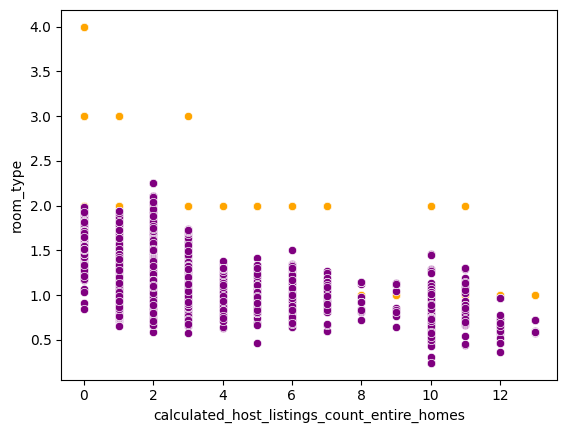

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='room_type', color="orange", data=f1)
sns.scatterplot(x='calculated_host_listings_count_entire_homes', y='Pred_room', color="purple", data=f1)

<Axes: xlabel='bedrooms', ylabel='accommodates'>

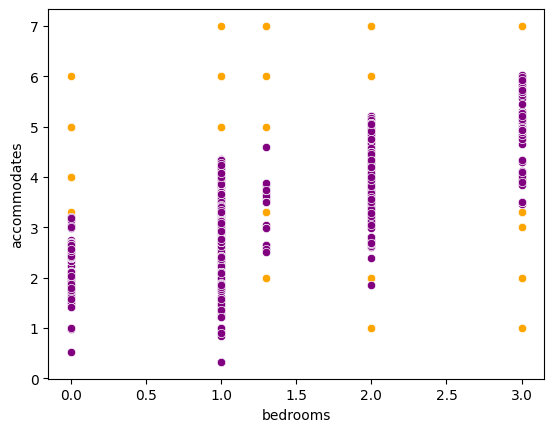

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='bedrooms', y='accommodates', color="orange", data=f1)
sns.scatterplot(x='bedrooms', y='Pred_accommodates', color="purple", data=f1)

<Axes: xlabel='accommodates', ylabel='bedrooms'>

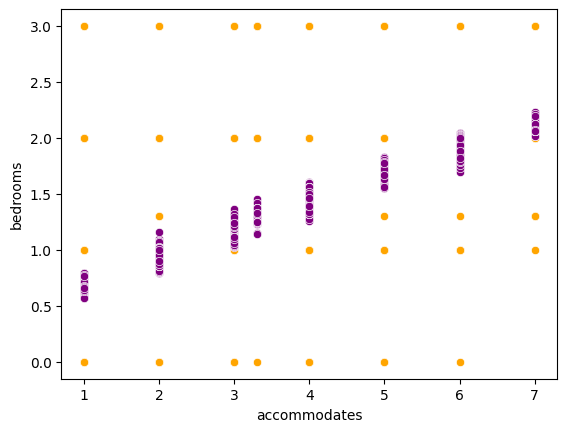

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='accommodates', y='bedrooms', color="orange", data=f1)
sns.scatterplot(x='accommodates', y='Pred_bedrooms', color="purple", data=f1)

<Axes: xlabel='accommodates', ylabel='price'>

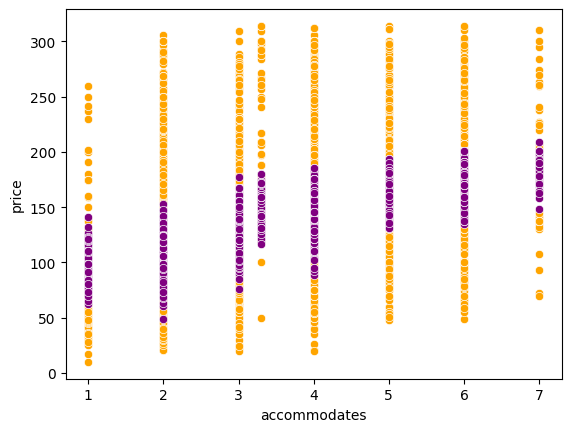

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='accommodates', y='price', color="orange", data=f1)
sns.scatterplot(x='accommodates', y='Pred_price', color="purple", data=f1)

<Axes: xlabel='review_scores_rating', ylabel='review_scores_value'>

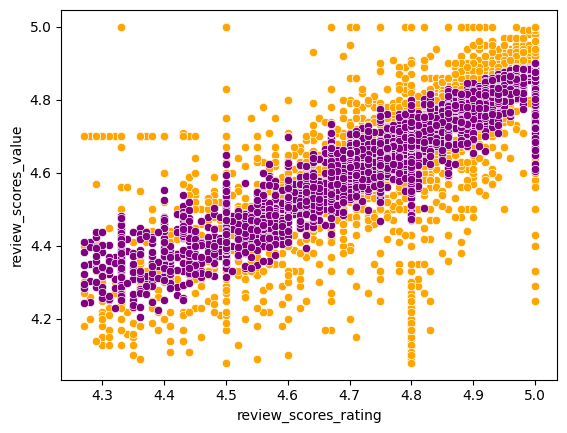

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='review_scores_rating', y='review_scores_value', color="orange", data=f1)
sns.scatterplot(x='review_scores_rating', y='Pred_rsv', color="purple", data=f1)

<Axes: xlabel='number_of_reviews_ltm', ylabel='reviews_per_month'>

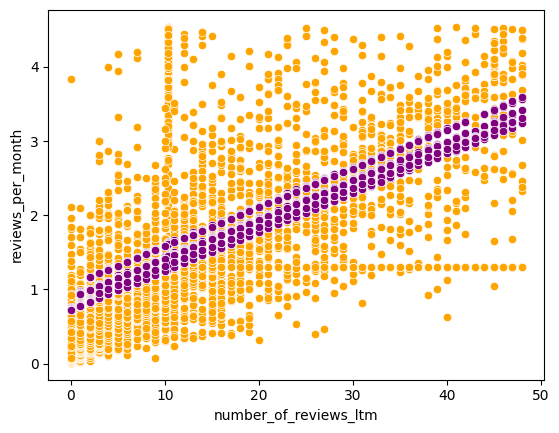

In [ ]:
#gráfica comparativa entre lo real vs lo predecido para la variable con mayor correlación inicial
sns.scatterplot(x='number_of_reviews_ltm', y='reviews_per_month', color="orange", data=f1)
sns.scatterplot(x='number_of_reviews_ltm', y='Pred_rpm', color="purple", data=f1)

**DETERMINAMOS COEFICIENTES DE DETERMINACIÓN**

In [ ]:
#Coeficiente de determinacion
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.2736842729965343

In [ ]:
#Coeficiente de determinacion
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep2)
coef_Deter2

0.11369565164270357

In [ ]:
#Coeficiente de determinacion
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep3)
coef_Deter3

0.277937512849705

In [ ]:
#Coeficiente de determinacion
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep4)
coef_Deter4

0.42286275961571596

In [ ]:
#Coeficiente de determinacion
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep5)
coef_Deter5

0.351402977087803

In [ ]:
#Coeficiente de determinacion
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep6)
coef_Deter6

0.53039632758928

In [ ]:
#Coeficiente de determinacion
coef_Deter7=model7.score(X=Vars_Indep7, y=Var_Dep7)
coef_Deter7

0.31831127308121554

In [ ]:
#Coeficiente de determinacion
coef_Deter8=model8.score(X=Vars_Indep8, y=Var_Dep8)
coef_Deter8

0.17760782215762305

In [ ]:
#Coeficiente de determinacion
coef_Deter9=model9.score(X=Vars_Indep9, y=Var_Dep9)
coef_Deter9

0.5662093691294792

In [ ]:
#Coeficiente de determinacion
coef_Deter10=model10.score(X=Vars_Indep10, y=Var_Dep10)
coef_Deter10

0.41174563267385245

**COEFICIENTES DE CORRELACION**

In [ ]:
#Coeficiente de Correlación
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.5231484234866185)

In [ ]:
#Coeficiente de Correlación
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.33718785808908297)

In [ ]:
#Coeficiente de Correlación
coef_Correl3=np.sqrt(coef_Deter3)
coef_Correl3

np.float64(0.5271977929105024)

In [ ]:
#Coeficiente de Correlación
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.6502789859865655)

In [ ]:
#Coeficiente de Correlación
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.5927925244871117)

In [ ]:
#Coeficiente de Correlación
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.7282831369661665)

In [ ]:
#Coeficiente de Correlación
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.5641908126522582)

In [ ]:
#Coeficiente de Correlación
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.42143543059123906)

In [ ]:
#Coeficiente de Correlación
coef_Correl9=np.sqrt(coef_Deter9)
coef_Correl9

np.float64(0.7524688492751571)

In [ ]:
#Coeficiente de Correlación
coef_Correl10=np.sqrt(coef_Deter10)
coef_Correl10

np.float64(0.6416740860233117)

In [197]:
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 60 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Pred_id                                       4843 non-null   float64
 1   Pred_hrr                                      4843 non-null   float64
 2   Pred_his                                      4843 non-null   float64
 3   Pred_chl                                      4843 non-null   float64
 4   Pred_room                                     4843 non-null   float64
 5   Pred_accommodates                             4843 non-null   float64
 6   Pred_bedrooms                                 4843 non-null   float64
 7   Pred_price                                    4843 non-null   float64
 8   Pred_rsv                                      4843 non-null   float64
 9   Pred_rpm                                      4843 non-null   f

In [198]:
f2=f1.iloc[ :  , [0,1,2,3,4,5,6,7,8,9,18,19,24,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59] ]

In [199]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Pred_id,1.000000,-0.142034,-0.203845,0.059474,0.018154,-0.014617,-0.013995,0.009831,0.105653,-0.152250,...,0.243069,0.209520,0.267565,0.072293,0.047907,0.088467,0.055336,-0.025485,NaN,0.236673
Pred_hrr,-0.142034,1.000000,0.693233,-0.033742,-0.086045,0.063443,0.059297,0.115188,0.205162,0.783427,...,0.037665,0.003994,0.020100,0.098858,0.198356,-0.075292,0.008975,-0.103161,NaN,0.486423
Pred_his,-0.203845,0.693233,1.000000,-0.111278,-0.088138,0.086250,0.063884,0.176181,0.567636,0.705811,...,0.245091,0.166157,0.171635,0.214548,0.511656,-0.136623,-0.034834,-0.127736,NaN,0.512893
Pred_chl,0.059474,-0.033742,-0.111278,1.000000,-0.313479,-0.044927,0.001654,-0.062399,-0.146509,-0.085560,...,-0.087120,-0.076888,-0.087936,-0.048119,-0.188949,0.650279,0.920435,0.059221,NaN,-0.047711
Pred_room,0.018154,-0.086045,-0.088138,-0.313479,1.000000,-0.617204,-0.773832,-0.697533,-0.052909,-0.047909,...,-0.002055,0.004509,0.000267,-0.094815,-0.046803,0.065390,-0.528654,0.333168,NaN,-0.033267
Pred_accommodates,-0.014617,0.063443,0.086250,-0.044927,-0.617204,1.000000,0.791510,0.857265,0.030637,0.075947,...,-0.003437,-0.011551,-0.009812,0.073578,0.039691,-0.010640,0.189339,-0.339119,NaN,0.054061
Pred_bedrooms,-0.013995,0.059297,0.063884,0.001654,-0.773832,0.791510,1.000000,0.838179,-0.001422,0.055079,...,-0.029351,-0.048377,-0.039589,0.052795,0.032610,0.072790,0.173324,-0.248937,NaN,0.024501
Pred_price,0.009831,0.115188,0.176181,-0.062399,-0.697533,0.857265,0.838179,1.000000,0.205099,0.094061,...,0.066605,0.083687,0.073179,0.471404,0.179122,-0.010315,0.193762,-0.352361,NaN,0.067834
Pred_rsv,0.105653,0.205162,0.567636,-0.146509,-0.052909,0.030637,-0.001422,0.205099,1.000000,0.030422,...,0.655011,0.532563,0.616583,0.467345,0.752469,-0.147952,-0.046259,-0.082061,NaN,0.006285
Pred_rpm,-0.152250,0.783427,0.705811,-0.085560,-0.047909,0.075947,0.055079,0.094061,0.030422,1.000000,...,-0.097023,-0.105550,-0.118507,0.027914,0.070571,-0.102562,-0.049406,-0.096959,NaN,0.641674


In [200]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Pred_id,Pred_hrr,Pred_his,Pred_chl,Pred_room,Pred_accommodates,Pred_bedrooms,Pred_price,Pred_rsv,Pred_rpm,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
Pred_id,1.000000,0.142034,0.203845,0.059474,0.018154,0.014617,0.013995,0.009831,0.105653,0.152250,...,0.243069,0.209520,0.267565,0.072293,0.047907,0.088467,0.055336,0.025485,NaN,0.236673
Pred_hrr,0.142034,1.000000,0.693233,0.033742,0.086045,0.063443,0.059297,0.115188,0.205162,0.783427,...,0.037665,0.003994,0.020100,0.098858,0.198356,0.075292,0.008975,0.103161,NaN,0.486423
Pred_his,0.203845,0.693233,1.000000,0.111278,0.088138,0.086250,0.063884,0.176181,0.567636,0.705811,...,0.245091,0.166157,0.171635,0.214548,0.511656,0.136623,0.034834,0.127736,NaN,0.512893
Pred_chl,0.059474,0.033742,0.111278,1.000000,0.313479,0.044927,0.001654,0.062399,0.146509,0.085560,...,0.087120,0.076888,0.087936,0.048119,0.188949,0.650279,0.920435,0.059221,NaN,0.047711
Pred_room,0.018154,0.086045,0.088138,0.313479,1.000000,0.617204,0.773832,0.697533,0.052909,0.047909,...,0.002055,0.004509,0.000267,0.094815,0.046803,0.065390,0.528654,0.333168,NaN,0.033267
Pred_accommodates,0.014617,0.063443,0.086250,0.044927,0.617204,1.000000,0.791510,0.857265,0.030637,0.075947,...,0.003437,0.011551,0.009812,0.073578,0.039691,0.010640,0.189339,0.339119,NaN,0.054061
Pred_bedrooms,0.013995,0.059297,0.063884,0.001654,0.773832,0.791510,1.000000,0.838179,0.001422,0.055079,...,0.029351,0.048377,0.039589,0.052795,0.032610,0.072790,0.173324,0.248937,NaN,0.024501
Pred_price,0.009831,0.115188,0.176181,0.062399,0.697533,0.857265,0.838179,1.000000,0.205099,0.094061,...,0.066605,0.083687,0.073179,0.471404,0.179122,0.010315,0.193762,0.352361,NaN,0.067834
Pred_rsv,0.105653,0.205162,0.567636,0.146509,0.052909,0.030637,0.001422,0.205099,1.000000,0.030422,...,0.655011,0.532563,0.616583,0.467345,0.752469,0.147952,0.046259,0.082061,NaN,0.006285
Pred_rpm,0.152250,0.783427,0.705811,0.085560,0.047909,0.075947,0.055079,0.094061,0.030422,1.000000,...,0.097023,0.105550,0.118507,0.027914,0.070571,0.102562,0.049406,0.096959,NaN,0.641674


<Axes: >

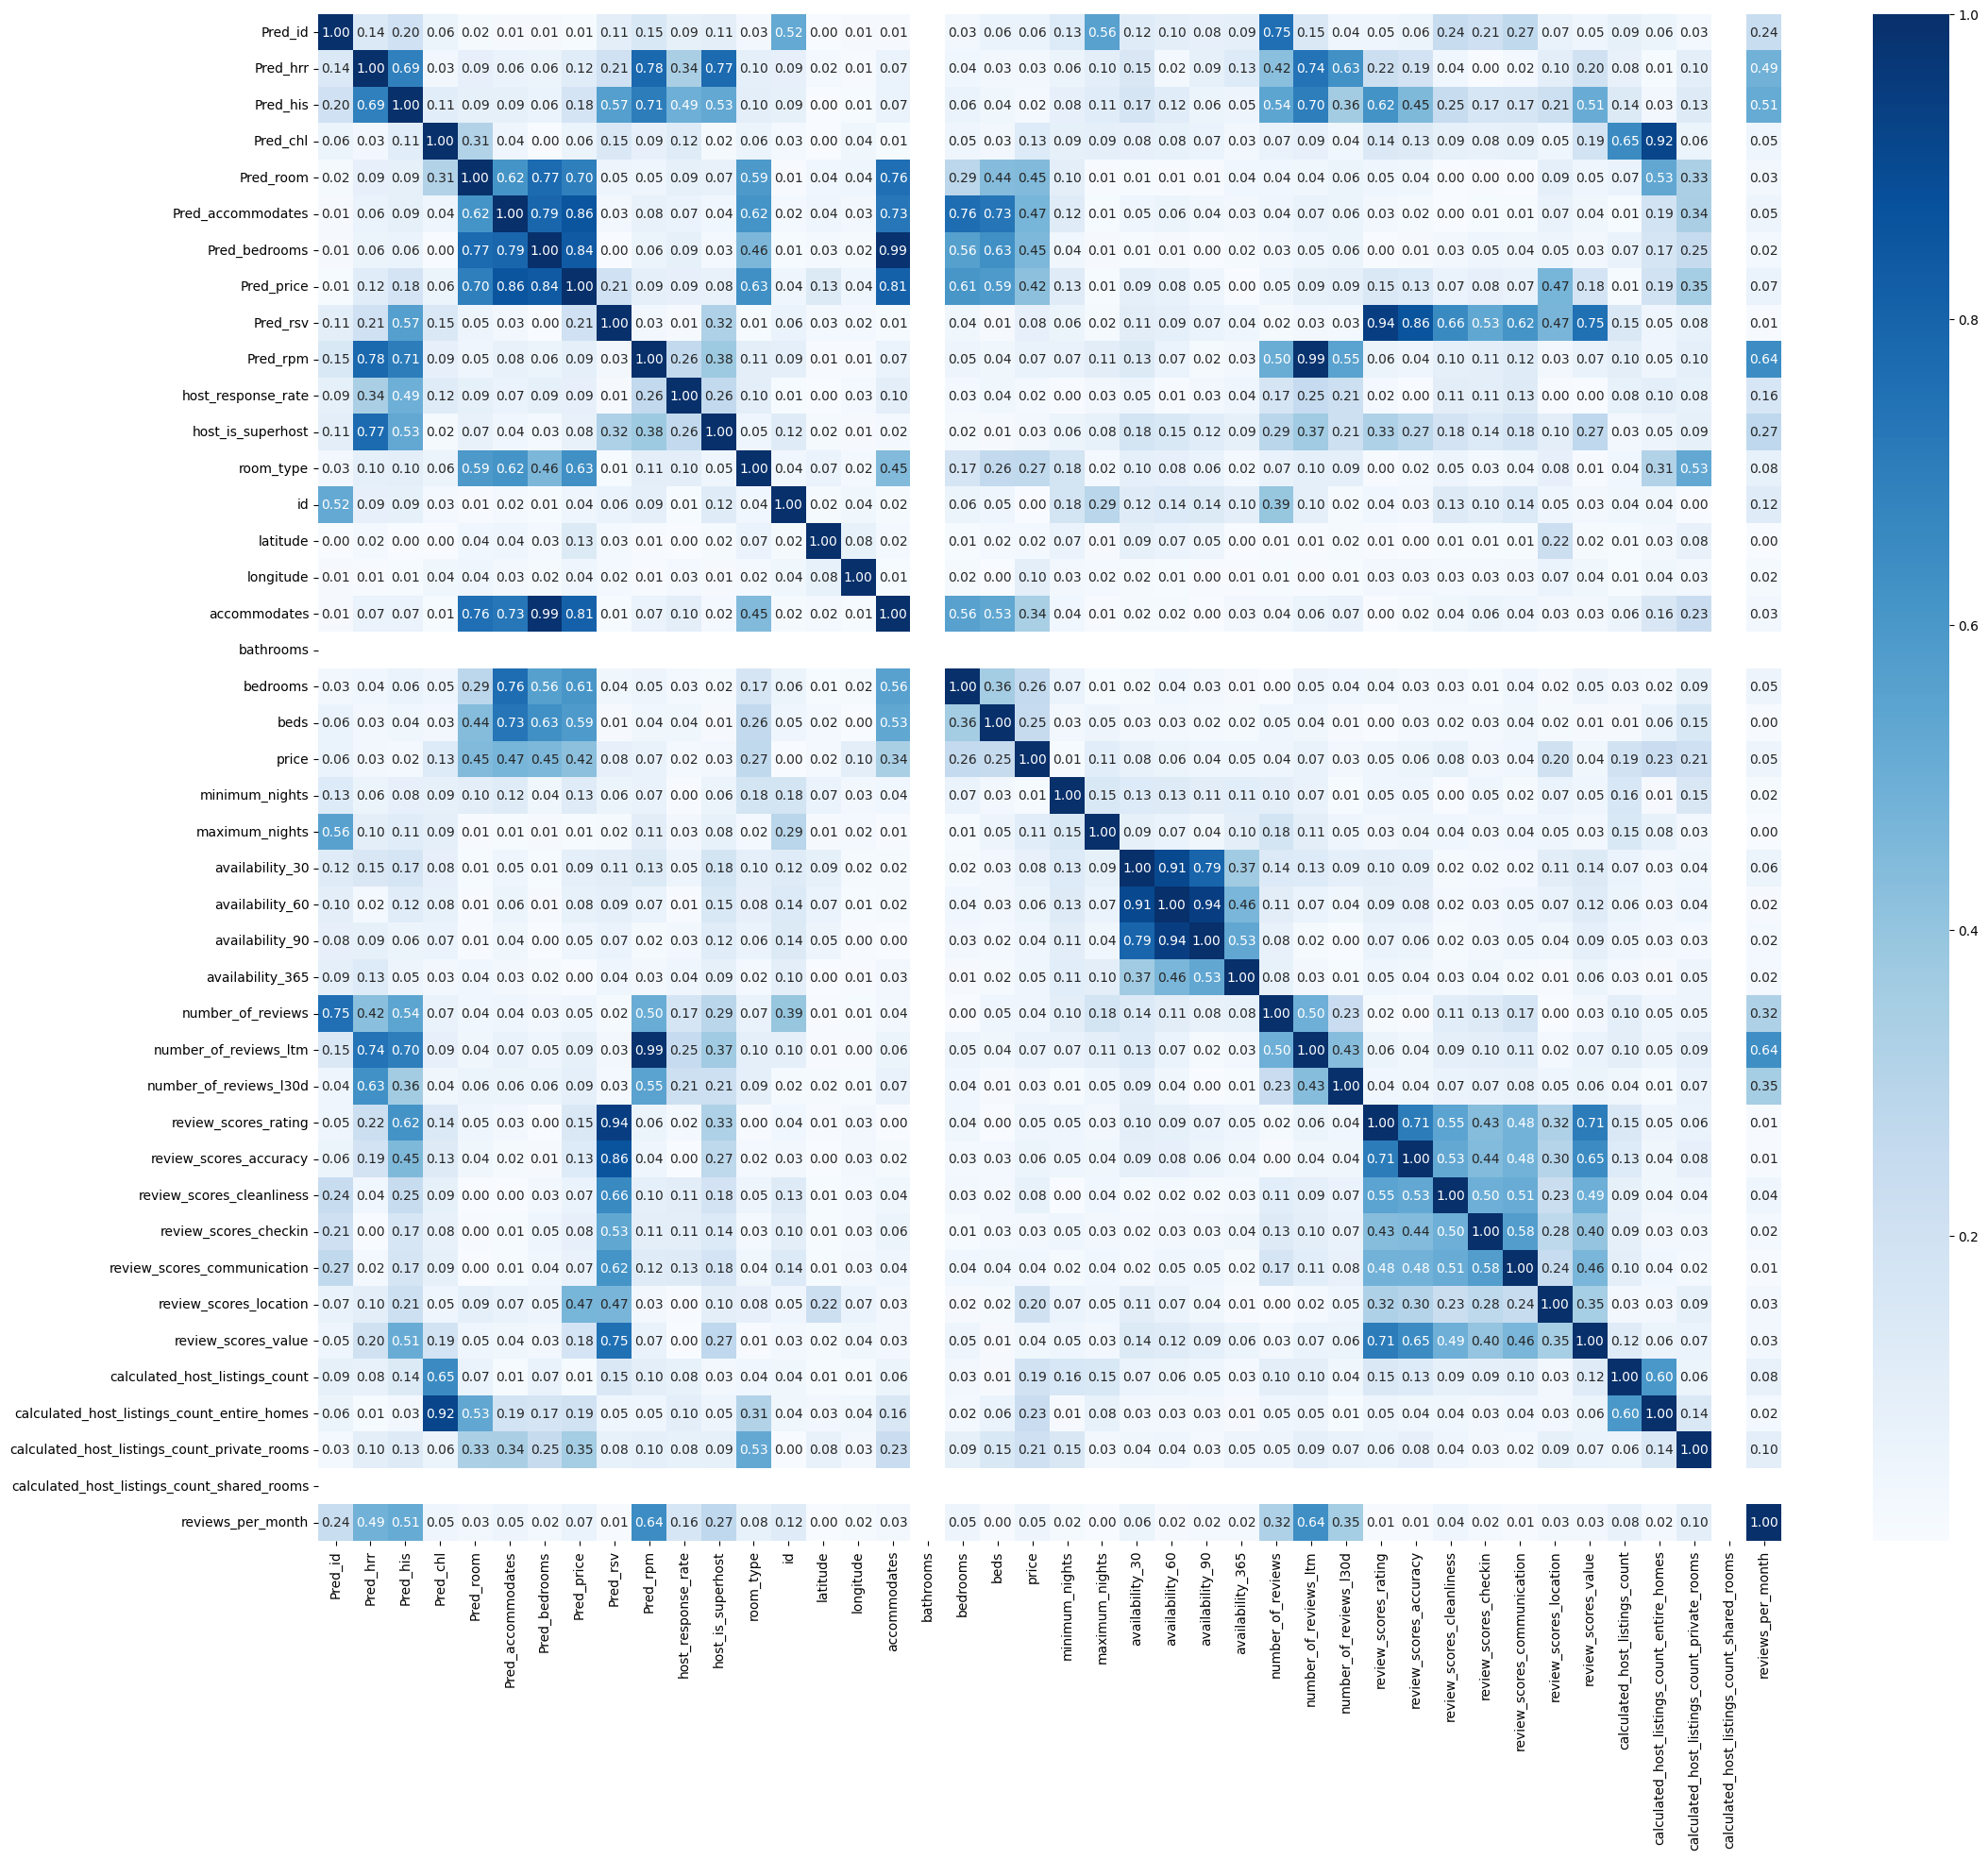

In [201]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(25,21))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Blues', annot=True, fmt=".2f")
Heart_Nap